# Project 3
## Group Members: Abel Mendoza, Divyansh Mohan Rao, Hiep Do, Jarred Ethen Siriban, Samad Ahmad, Santiago Zavala
## Class: CPSC 481-05
## Section: 13770

Tools:
Jupyter Notebooks
Python language

Approach:
Taking the information that was given to us, such as:
The distinct variables
The CPTs of the variables that were given

We decided to first follow through in creating our bayesian network based off of each possible conditions that the distinct variable create from whether or not:
The cable is connected
and/or
the dhcp server is set up correctly
and/or
the dns is set up correctly
etc.

To then implement all of the rules/distinct variables/ and or newly created bayesian network we decided to utilize the code that was provided by the book and use it for our implimentation of not only our bayesian network but also our sampling algorithm.

Down below you will find a diagram of our bayesian network.

## Bayesian Network Diagram

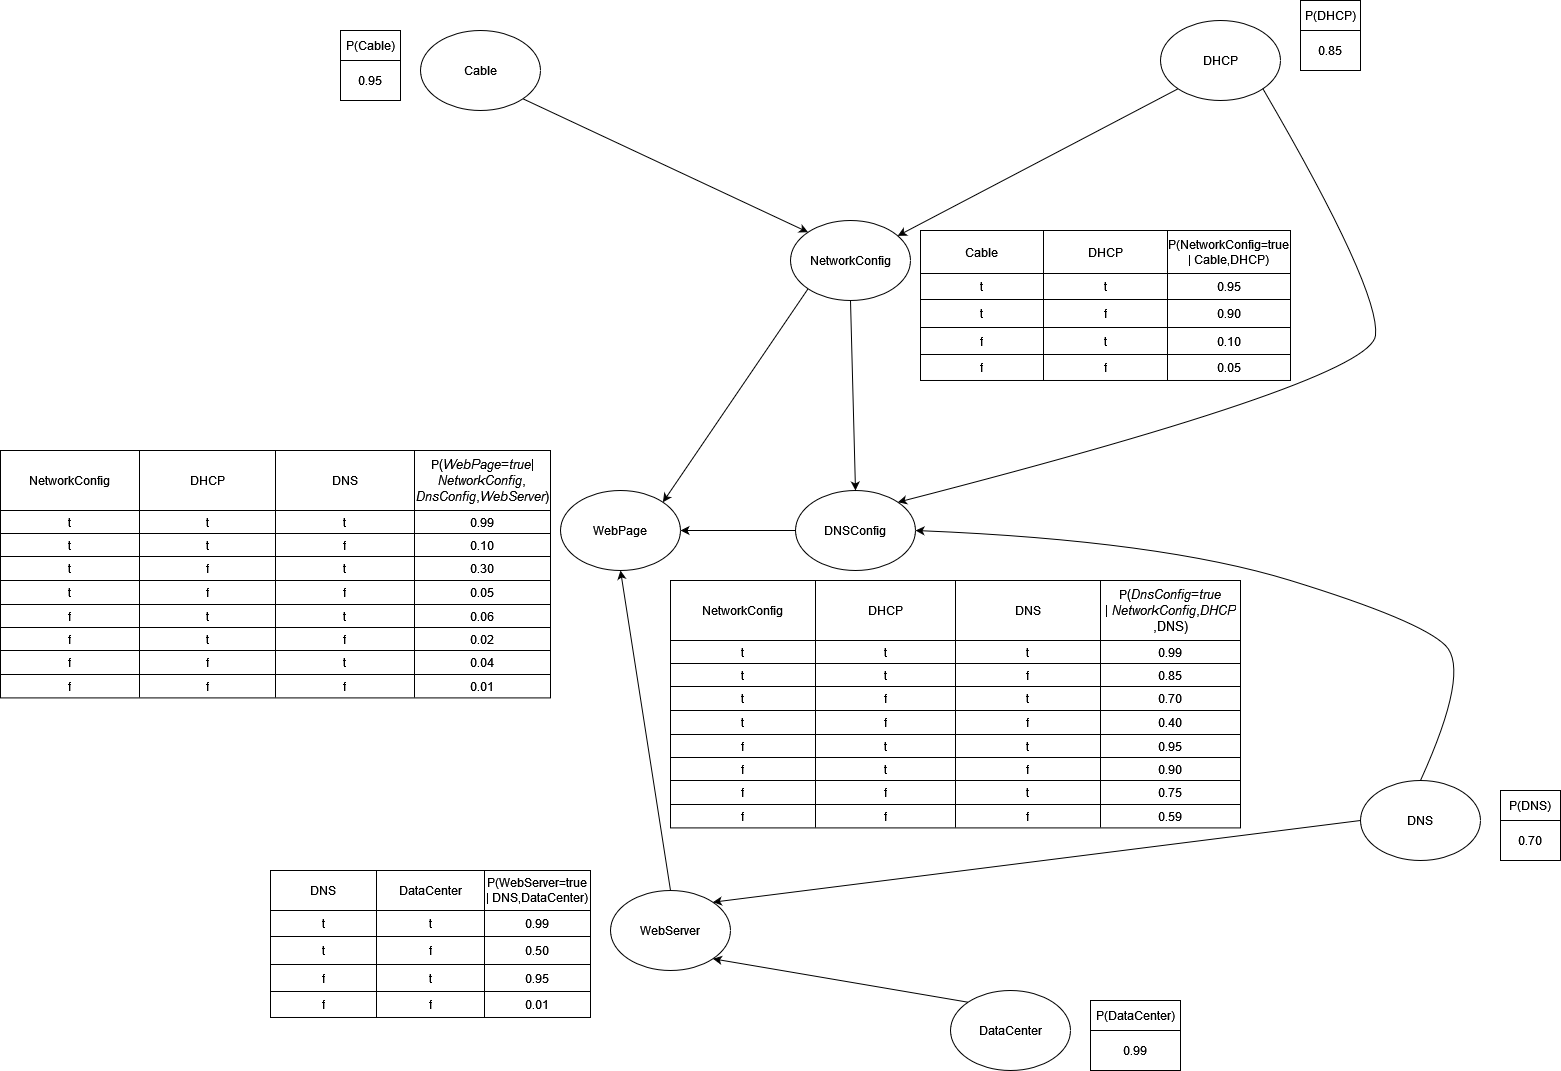

# Importing code from the book


In [ ]:
!git clone https://github.com/aimacode/aima-python.git
%cd aima-python
!pip install -r requirements.txt
!git submodule init
!git submodule update
!pip install -r requirements.txt

Cloning into 'aima-python'...
remote: Enumerating objects: 5095, done.
remote: Total 5095 (delta 0), reused 0 (delta 0), pack-reused 5095
Receiving objects: 100% (5095/5095), 17.44 MiB | 35.50 MiB/s, done.
Resolving deltas: 100% (3418/3418), done.
/content/aima-python
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.7/83.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 86.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 13.1 MB/s eta 0:00:00
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19481 sha256=19a1f2f325adf5a9c1417f005bb7de9523

In [ ]:
!git submodule init
!git submodule update

# Implementing Our Bayesian Network



In [ ]:
from utils import *
from probability4e import  BayesNet

T, F = True, False
portal_network =  BayesNet([
    ('Cable', '', 0.95),
    ('Dhcp', '', 0.85),
    ('Dns', '', 0.70),
    ('DataCenter', '', 0.99),
    ('NetworkConfig', 'Cable Dhcp',
     {(T, T): 0.95, (T, F): 0.90, (F, T): 0.10, (F, F): 0.05}),
    ('DnsConfig', 'NetworkConfig Dhcp Dns',
     {(T, T, T): 0.99, (T, T, F): 0.85, (T, F, T): 0.70, (T, F, F): 0.40,
      (F, T, T): 0.95, (F, T, F): 0.90, (F, F, T): 0.75, (F, F, F): 0.50}),
    ('WebServer', 'Dns DataCenter',
     {(T, T): 0.99, (T, F): 0.50, (F, T): 0.95, (F, F): 0.01}),
    ('WebPage', 'NetworkConfig DnsConfig WebServer',
     {(T, T, T): 0.99, (T, T, F): 0.10, (T, F, T): 0.30, (T, F, F): 0.05,
      (F, T, T): 0.06, (F, T, F): 0.02, (F, F, T): 0.04, (F, F, F): 0.01})
])
portal_network.variables

['Cable',
 'Dhcp',
 'Dns',
 'DataCenter',
 'NetworkConfig',
 'DnsConfig',
 'WebServer',
 'WebPage']

# Sampling Algorithms

After we finished creating and implementing our bayesian network we than made sure that we understood how to sample the networks and check a couple of different approaches through enumeration ask sampling method and the prior sample method.

In [ ]:
from probability4e import enumeration_ask
test = enumeration_ask("NetworkConfig", {"Cable": T, "Dhcp": F}, portal_network)
print(test[T], test[F])

0.9000000000000001 0.09999999999999998


In [ ]:
enumeration_ask("WebPage", {},portal_network)[T]

0.8142407926765001

In [ ]:
from probability4e import prior_sample
N = 1000
portal_network.variables
all_observations = [prior_sample(portal_network) for x in range(N)]

In [ ]:
web_page_true = [observation for observation in all_observations if observation['WebPage'] == True]
# matches with the value we got using enumeration.ask
answer = len(web_page_true) / N
print(answer)

0.829


## Approximate Inference

After running our test to make sure that everything before hand was running to our own satisfaction and that we felt solid in our base development of the problem given, we began to answer the questions that the project asked of us. Such as:
1. How likely is it that the employee won’t be able to access the web page?
2. How likely is the web server to be down?
3. If the employee can’t access the web page, how likely is the web server to be down?
4. If the DHCP and DNS servers are both down, how likely is it that the employee will be able to access the web page?
5. If the web server is down and the PC’s DNS configuration is incorrect, how likely is the data center to be functioning?



In [ ]:
from probability4e import rejection_sampling
def approximate_inference(bayes_net, n=10000):
    # Query 1: How likely is it that the employee won’t be able to access the web page?
    query1 = rejection_sampling('WebPage', {}, bayes_net, n)

    # Query 2: How likely is the web server to be down?
    query2 = rejection_sampling('WebServer', {}, bayes_net, n)

    # Query 3: If the employee can’t access the web page, how likely is the web server to be down?
    query3 = rejection_sampling('WebServer', {'WebPage': False}, bayes_net, n)

    # Query 4: If the DHCP and DNS servers are both down, how likely is it that the employee will be able to access the web page?
    query4 = rejection_sampling('WebPage', {'Dhcp': False, 'Dns': False,}, bayes_net, n)

    # Query 5: If the web server is down and the PC’s DNS configuration is incorrect, how likely is the data center to be functioning?
    query5 = rejection_sampling('DataCenter', {'WebServer': False, 'DnsConfig': False, }, bayes_net, n)

    return query1, query2, query3, query4, query5

queries = approximate_inference(portal_network)
queryList = ["","How likely is it that the employee won’t be able to access the web page?","How likely is the web server to be down?","If the employee can’t access the web page, how likely is the web server to be down?", "If the DHCP and DNS servers are both down, how likely is it that the employee will be able to access the web page?", "If the web server is down and the PC’s DNS configuration is incorrect, how likely is the data center to be functioning?"]
for i, query in enumerate(queries, start=1):
    print(f"Query {i}: {queryList[i]} :- True: {query[True]} , False: {query[False]} ")

Query 1: How likely is it that the employee won’t be able to access the web page? :- True: 0.8156 , False: 0.1844 
Query 2: How likely is the web server to be down? :- True: 0.9718 , False: 0.0282 
Query 3: If the employee can’t access the web page, how likely is the web server to be down? :- True: 0.8697050938337801 , False: 0.13029490616621983 
Query 4: If the DHCP and DNS servers are both down, how likely is it that the employee will be able to access the web page? :- True: 0.4663677130044843 , False: 0.5336322869955157 
Query 5: If the web server is down and the PC’s DNS configuration is incorrect, how likely is the data center to be functioning? :- True: 0.8611111111111112 , False: 0.1388888888888889 


## Comparision between approximate Inference and Joint distribution

In this section, we used our approximate inference function and applied it to the cells below. We also utilized 'enumeration_ask' from the 'aima-python' repository. Using the function from above, those results are compared to the results of 'enumeration_ask,' which give us the outcome of a joint distribution given the same parameters used in the approximate inference function.

Analyzing each query comparison, the probabilities of approximate inference and joint distribution appear closely similar, though these answers are not the same.

In [ ]:
# from probability import enumeration_joint_ask
query1_result = queries[0]
print(f"The approximate likelihood that employee won't be able to access the web page is:- True: {query1_result[True]} False: {query1_result[False]}")
employee_joint_dist = enumeration_ask("WebPage", {},portal_network)
print(f"The full joint distribution likelihood that employee won't be able to access the web page is:- True: {employee_joint_dist[True]} False: {employee_joint_dist[False]}")

The approximate likelihood that employee won't be able to access the web page is:- True: 0.8156 False: 0.1844
The full joint distribution likelihood that employee won't be able to access the web page is:- True: 0.8142407926765001 False: 0.1857592073235001


In [ ]:
query2_result = queries[1]
print(f"The approximate likelihood that the web server to be down is:- True: {query2_result[True]} False: {query2_result[False]}")
webserver_joint_dist = enumeration_ask("WebServer", {},portal_network)
print(f"The full joint distribution likelihood that the web server to be down is:- True: {webserver_joint_dist[True]} False: {webserver_joint_dist[False]}")

The approximate likelihood that the web server to be down is:- True: 0.9718 False: 0.0282
The full joint distribution likelihood that the web server to be down is:- True: 0.9717499999999999 False: 0.028250000000000025


In [ ]:
query3_result = queries[2]
print(f"The approximate likelihood that the web server to be down given that the employee can't access the webpage is:- True: {query3_result[True]} False: {query3_result[False]}")
webserver_given_webpage_joint_dist = enumeration_ask("WebServer", {"WebPage": False},portal_network)
print(f"The full joint distribution likelihood that the web server to be down given that the employee can't access the webpage is:- True: {webserver_given_webpage_joint_dist[True]} False: {webserver_given_webpage_joint_dist[False]}")

The approximate likelihood that the web server to be down given that the employee can't access the webpage is:- True: 0.8697050938337801 False: 0.13029490616621983
The full joint distribution likelihood that the web server to be down given that the employee can't access the webpage is:- True: 0.8608344821201516 False: 0.1391655178798484


In [ ]:
query4_result = queries[3]
print(f"The approximate likelihood that employee will be able to access the web page given that DHCP and DNS servers are both down is:- True: {query4_result[True]} False: {query4_result[False]}")
webpage_given_Dhcp_Dns_joint_dist = enumeration_ask("WebPage", {"Dhcp": False, "Dns": False},portal_network)
print(f"The full joint distribution likelihood that employee will be able to access the web page given that DHCP and DNS servers are both down is:- True: {webpage_given_Dhcp_Dns_joint_dist[True]} False: {webpage_given_Dhcp_Dns_joint_dist[False]}")

The approximate likelihood that employee will be able to access the web page given that DHCP and DNS servers are both down is:- True: 0.4663677130044843 False: 0.5336322869955157
The full joint distribution likelihood that employee will be able to access the web page given that DHCP and DNS servers are both down is:- True: 0.4749753794999999 False: 0.5250246205


In [ ]:
query5_result = queries[4]
print(f"The approximate likelihood that the data center to be functioning given web server is down and PC's configuration is incorrect is:- True: {query5_result[True]} False: {query5_result[False]}")
DataCenter_given_webserver_DNSconfig_joint_dist = enumeration_ask("DataCenter", {"WebServer": False, "DnsConfig": False},portal_network)
print(f"The full joint distribution likelihood that the data center to be functioning given web server is down and PC's configuration is incorrect is:- True: {DataCenter_given_webserver_DNSconfig_joint_dist[True]} False: {DataCenter_given_webserver_DNSconfig_joint_dist[False]}")

The approximate likelihood that the data center to be functioning given web server is down and PC's configuration is incorrect is:- True: 0.8611111111111112 False: 0.1388888888888889
The full joint distribution likelihood that the data center to be functioning given web server is down and PC's configuration is incorrect is:- True: 0.8108123755983196 False: 0.18918762440168033


## Attempt to create a troubleshooting agent
This is a mini program that attempts to diagnose and troubleshoot network errors for the user. It uses bayesian network to determine the most probable cause for the network failure and asks user a series of follow-up question to further determine if other components in the network system is also down, such as the DHCP, DNS, Data Center, etc.

In [ ]:
class TroubleshootingAssistant:
    def __init__(self, bayesian_network):
        self.bayesian_network = bayesian_network
        self.observed_issues = {'WebPage': False}

    def ask_user_for_issue(self):
        print("\nTroubleshooting Assistant")
        print("Enter the observed issues (or 'done' to finish):")
        for variable in reversed(self.bayesian_network.variables):
          if variable != "WebPage":
            value = input(f"Is {variable} working? (True/False): ").lower()
            if value == 'done':
                break
            self.observed_issues[variable] = value == 'true'

    def suggest_most_probable_issue(self):
        evidence = self.observed_issues.copy()
        print("\nSuggested Most Probable Issue:")
        max_probability = 0.0
        most_probable_issue = None
        for variable in reversed(self.bayesian_network.variables):
            if variable not in self.observed_issues:
                probability = rejection_sampling(variable, evidence, self.bayesian_network)
                if probability[True] > max_probability:
                    max_probability = probability[True]
                    most_probable_issue = variable
        if most_probable_issue:
            evidence[most_probable_issue] = True
            print(f"Most Probable Issue: {most_probable_issue}")
            print(f"Probability: {round(max_probability * 100)}%")
            value = input(f"Have you verified {most_probable_issue} and the issue is not yet resolved? (True/False): ").lower()

            if value == 'true':
              self.observed_issues[most_probable_issue] = value == 'true'
              self.suggest_most_probable_issue()
        else:
            print("No probable issues based on the provided evidence.")

    def troubleshoot(self):
        # while True:
          print("\nTroubleshooting Assistant For Webpage")

          self.suggest_most_probable_issue()
            # self.ask_user_for_issue()
            # if 'done' in self.observed_issues.values():
            #     break
            # self.suggest_most_probable_issue()
            # break

if __name__ == "__main__":
    troubleshooting_assistant = TroubleshootingAssistant(portal_network)
    troubleshooting_assistant.troubleshoot()



Troubleshooting Assistant For Webpage

Suggested Most Probable Issue:
Most Probable Issue: DataCenter
Probability: 96%
Have you verified DataCenter and the issue is not yet resolved? (True/False): True

Suggested Most Probable Issue:
Most Probable Issue: WebServer
Probability: 89%
Have you verified WebServer and the issue is not yet resolved? (True/False): True

Suggested Most Probable Issue:
Most Probable Issue: Cable
Probability: 74%
Have you verified Cable and the issue is not yet resolved? (True/False): True

Suggested Most Probable Issue:
Most Probable Issue: Dhcp
Probability: 58%
Have you verified Dhcp and the issue is not yet resolved? (True/False): True

Suggested Most Probable Issue:
Most Probable Issue: DnsConfig
Probability: 61%
Have you verified DnsConfig and the issue is not yet resolved? (True/False): True

Suggested Most Probable Issue:
Most Probable Issue: Dns
Probability: 73%
Have you verified Dns and the issue is not yet resolved? (True/False): True

Suggested Most P